1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson
import pandas as pd


%matplotlib inline

In [6]:
def f(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2) #x restricted to -2 < x < 2
y = np.linspace(-1, 1) #y restricted to -1 < y < 1
xg, yg = np.meshgrid(x, y) 

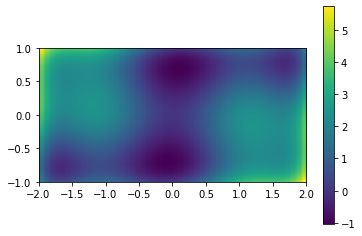

In [5]:
# For plotting 2D
plt.figure()
plt.imshow(f([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()

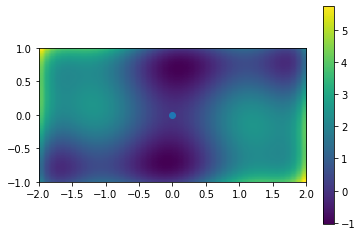

In [13]:
x_min = optimize.minimize(f, x0=[0, 0])

plt.figure()
# Show the function in 2D
plt.imshow(f([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()

# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()

In [62]:
from scipy.optimize import fmin

fmin(f,[0,0]) 
#optimize.minimize(f, x0=[0, 0])

Optimization terminated successfully.
         Current function value: -1.031628
         Iterations: 52
         Function evaluations: 101


array([-0.08985145,  0.71266538])

In [83]:
#For finding global and local minimas
import pandas as pd

bnds = ((-2,2), (-1, 1))  #search range
minimas_list = [] 
for i in range(100):
    #used optimization in a loop with a random starting points inside the boundries


    x_init = np.random.uniform(low=bnds[0][0], high=bnds[0][1])
    y_init = np.random.uniform(low=bnds[1][0], high=bnds[1][1])

    min_test = optimize.minimize(f,[x_init, y_init], bounds = bnds)

    minimas_list.append([list(min_test.x)[0],list(min_test.x)[1], float(min_test.fun)]) #created list of minimums that i found


minima_df = pd.DataFrame(minimas_list,columns=["x","y","f(x,y)"]) #made them a dataframe so it will be easier to operate


minima_df = minima_df.round(5) #rounded after 0.0000... because eventhough it finds same values after some decimal it changes
minima_df.drop_duplicates() #i dropped duplicates to find the local and global minimums

minima_df_cols = minima_df.drop_duplicates()

minima_df_cols #unique minimas that we found.

,x,y,"f(x,y)"
0,0.08984,-0.71266,-1.03163
1,-1.60710,-0.56865,2.10425
3,-0.08984,0.71266,-1.03163
6,-1.70361,0.79608,-0.21546
9,1.70361,-0.79608,-0.21546
60,0.03975,0.14182,-0.06688


Text(0.5, 0, 'f(x, y)')

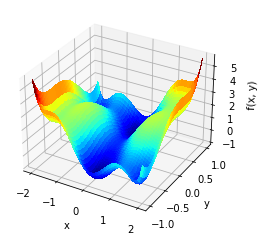

In [84]:
# 3D surface plot of the function
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, f([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Text(0, 0.5, 'Min and max temperature')

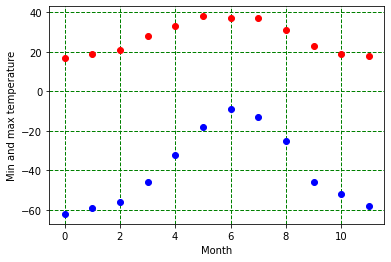

In [10]:
import numpy as np

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

#plot
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [11]:
from scipy import optimize

#cos f(t) = a \cos(2\pi t + b)+c$$
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
                                      
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

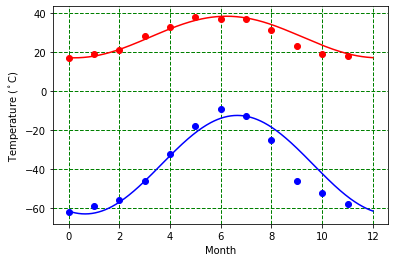

In [12]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [5]:
data=np.load('data/residuals_261.pkl',allow_pickle=True)
df=pd.DataFrame(data.item())
df


,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


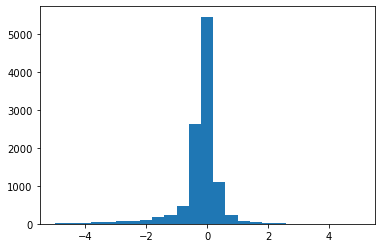

In [6]:
plt.figure()
val_in_bin, bins, patches = plt.hist(df['residuals'], bins=25,range=(-5,5))

C:\Users\utente\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


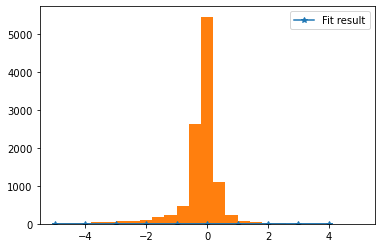

In [26]:
def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)

# calculate bin centres
bin_middles = 0.5 * (bins[1:] + bins[:-1])

# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, val_in_bin,full_output=False)
#res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                    #  temp_max, [20, 10, 0]

# plot poisson-deviation with fitted parameter
x_plot = np.arange(-5, 5)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='*', linestyle='-',
    label='Fit result',
)
plt.hist(df['residuals'], bins=25,range=(-5,5))
plt.hist
plt.legend()
plt.show()

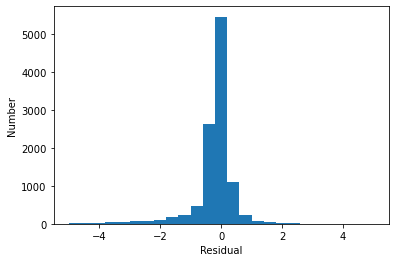

In [62]:
#Data
import pandas as pd

data = np.load('data/residuals_261.pkl', allow_pickle=True)

#converting to dataframe
df = pd.DataFrame(data.item())

#plotting raw histogram
h, bins, _  = plt.hist(df['residuals'], bins=25,range=(-5,5))
plt.xlabel('Residual')
plt.ylabel('Number')
plt.show()

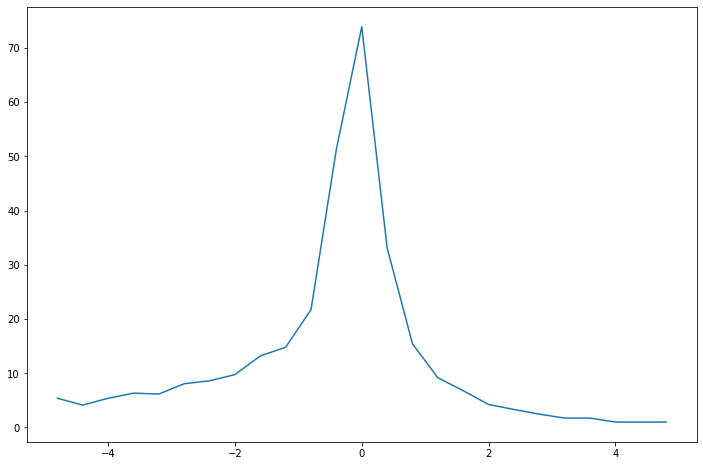

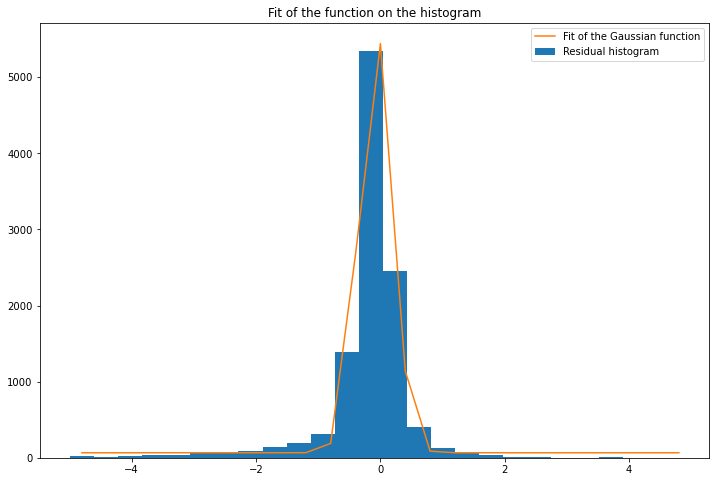

In [68]:
#plotting noiseless to see it clear
df = df[abs(df['residuals']) < 10]

bin_middles = 0.5 * (bins[:-1] + bins[1:])
sigma_i = np.sqrt(np.abs(h))
sigma_i[sigma_i == 0] = 1
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(bin_middles, sigma_i)

#fit it to the histogram of the residuals
def gaussian(x, a, b, x0, sigma):
    return a + b * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
    
popt, pcov = optimize.curve_fit(gaussian, bin_middles, h, full_output=False)
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(df['residuals'], bins=25, label='Residual histogram')
plt.plot(bin_middles, gaussian(bin_middles, *popt), label='Fit of the Gaussian function')
ax.set_title('Fit of the function on the histogram')
ax.legend() 

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [133]:
munich_data = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt',sep=" ", header=None)
munich_data

,0,1
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


C:\Users\utente\AppData\Local\Temp/ipykernel_14868/1401419499.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  mun_data_filtered = mun_data_filtered[mun_data_filtered[0].between(2008, 2012, inclusive=False)]  #cleaning data
C:\Users\utente\AppData\Local\Temp/ipykernel_14868/1401419499.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  mun_data_filtered = mun_data_filtered[mun_data_filtered[1].between(-50, 50, inclusive=False)]


Text(0, 0.5, 'Min and max temperature')

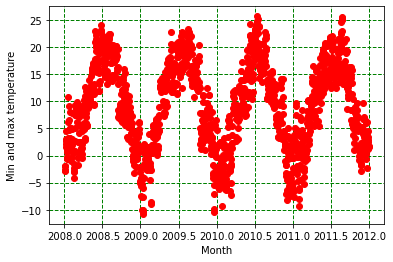

In [145]:
mun_data_filtered = munich_data


#cleaned data by filtering some of the values because it was noisy.

mun_data_filtered = mun_data_filtered[mun_data_filtered[0].between(2008, 2012, inclusive=False)]  #filtering by year
mun_data_filtered = mun_data_filtered[mun_data_filtered[1].between(-50, 50, inclusive=False)]  #cleaning noise on temperature



mun_temp = np.array(mun_data_filtered[1])
mun_years = np.array(mun_data_filtered[0])


#plot
years = np.arange(2014-1995)
plt.plot(mun_years, mun_temp, 'ro')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [146]:
def f_mun(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times) * 2 * np.pi)+time_offset)

In [149]:
res_max, cov_max = optimize.curve_fit(f_mun, mun_years,
                                      mun_temp, [-20, 30, 0])

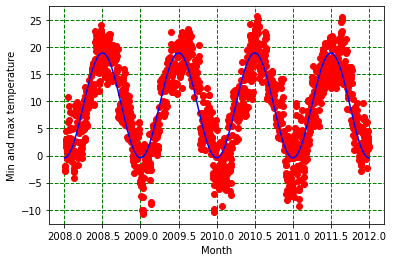

In [154]:
#f
plt.plot(mun_years, mun_temp, 'ro')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.plot(mun_years, f_mun(mun_years, *res_max), 'b-')

In [155]:
#g
def g_mun(t, a, b, c,d):
    return (d+ a * np.cos(t*(b) * 2 * np.pi+c))

In [157]:
res_max, cov_max = optimize.curve_fit(g_mun, mun_years,
                                      mun_temp, [-20, 30, 0, 0])

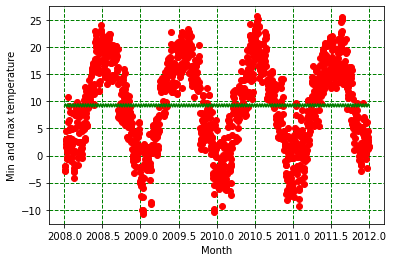

In [159]:
plt.plot(mun_years, mun_temp, 'ro')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
#plt.plot(mun_years, f_mun(mun_years, *res_max), 'b-')
plt.plot(mun_years, g_mun(mun_years, *res_max), 'g-')